## Homework 2 
### Car Fuel Efficiency Prediction


In [80]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [81]:
# read data
df = pd.read_csv("https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv")

df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [82]:
# We will be using the following columns for this project
# ['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']

df = df[["engine_displacement", "horsepower","vehicle_weight","model_year","fuel_efficiency_mpg"]]
df.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


In [83]:
# Exploratory data analysis
df.info() # there exist missing values in `horsepower` column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           8996 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB


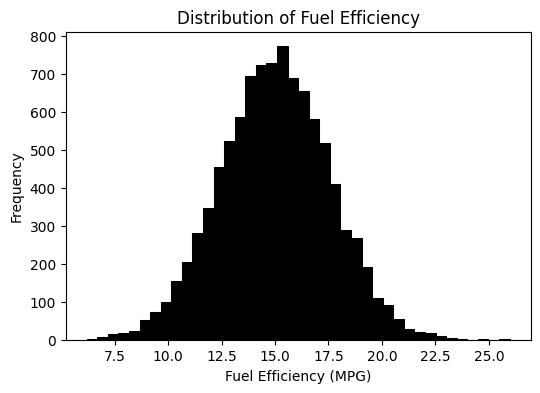

In [84]:
# Check the nature of distribution of the `Target` variable
plt.figure(figsize = (6, 4))

sns.histplot(df.fuel_efficiency_mpg, bins = 40, color= "k", alpha = 1)
plt.ylabel("Frequency")
plt.xlabel("Fuel Efficiency (MPG)")
plt.title("Distribution of Fuel Efficiency")

plt.show() # the `Target` follows a normal distribution

#### Question 1

In [85]:
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

# Question 2

In [86]:
# median of the `horsepower` variable
horsepower_median = df["horsepower"].median()
print(horsepower_median)

149.0


#### Question 3

In [87]:
# Prepare the dataset for spliting
np.random.seed(42) # for reproducibility

n = len(df) # number of observations

n_val = int(0.2 * n) # number of validation set
n_test = int(0.2 * n) # number of test set
n_train = n - (n_val + n_test) # number of train set

idx = np.arange(n)  # a numpy array of range n
np.random.shuffle(idx) # reoders the array randomly

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val  = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()


In [88]:
def fill_missing_values(df, col="horsepower"):
    # Make copies to preserve the original DataFrame
    df_1 = df.copy()
    df_2 = df.copy()

    # Fill missing values in the specified column
    df_1[col] = df[col].fillna(0)
    df_2[col] = df[col].fillna(df[col].mean())

    return df_1, df_2


In [89]:
df_train_1, df_train_2 = fill_missing_values(df_train)
df_val_1, df_val_2 = fill_missing_values(df_val)
df_test_1, df_test_2 = fill_missing_values(df_test)

In [90]:
df_train_2

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
483,220,144.0,2535.887591,2009,16.642943
7506,160,141.0,2741.170484,2019,16.298377
8795,230,155.0,2471.880237,2017,18.591822
1688,150,206.0,3748.164469,2015,11.818843
6217,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
1696,260,139.0,2606.972984,2009,16.964054
5685,280,132.0,4004.214323,2014,10.059094
6735,210,152.0,2500.175687,2020,17.593237
2052,250,154.0,2254.313245,2002,18.925748


In [91]:
# Create an array of the `Target` variables
def create_target_array(df, col = "fuel_efficiency_mpg"):
    y_df = df[col].values

    return y_df

In [92]:
y_train = create_target_array(df_train)
y_val = create_target_array(df_val)
y_test = create_target_array(df_test)

y_train

array([16.64294342, 16.29837715, 18.59182197, ..., 17.59323665,
       18.92574819, 17.96528447], shape=(5824,))

In [93]:
# delete the `target` column from the dataset
del df_train["fuel_efficiency_mpg"]
del df_val["fuel_efficiency_mpg"]
del df_test["fuel_efficiency_mpg"]

### Linear Regression Using Normal Equation
#### For a linear regresssion model, we want to find the weight vector w (and a bias b) that minimizes the mean squared error. the Normal Equation gives a direct (analytical) solution

In [94]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0]) # creates bias term (intercept)
    X = np.column_stack([ones, X]) # add intercept column to X

    XTX = X.T.dot(X) # compute XᵀX
    XTX_inv = np.linalg.inv(XTX) # Compute Inverse
    w = XTX_inv.dot(X.T).dot(y) # compute (XᵀX)⁻¹ Xᵀy

    return w[0], w[1:]

In [95]:
X_train_1 = df_train_1.values
X_val_1= df_val_1.values
x_test_1 = df_test_1.values

w_0, w = train_linear_regression(X= X_train_1, y = y_train)

In [96]:
# Prediction
y_pred = w_0 + X_val_1.dot(w)
y_pred

array([15.36634109, 14.60118181, 12.24703219, ..., 13.61312692,
       13.73334321, 15.81604972], shape=(1940,))

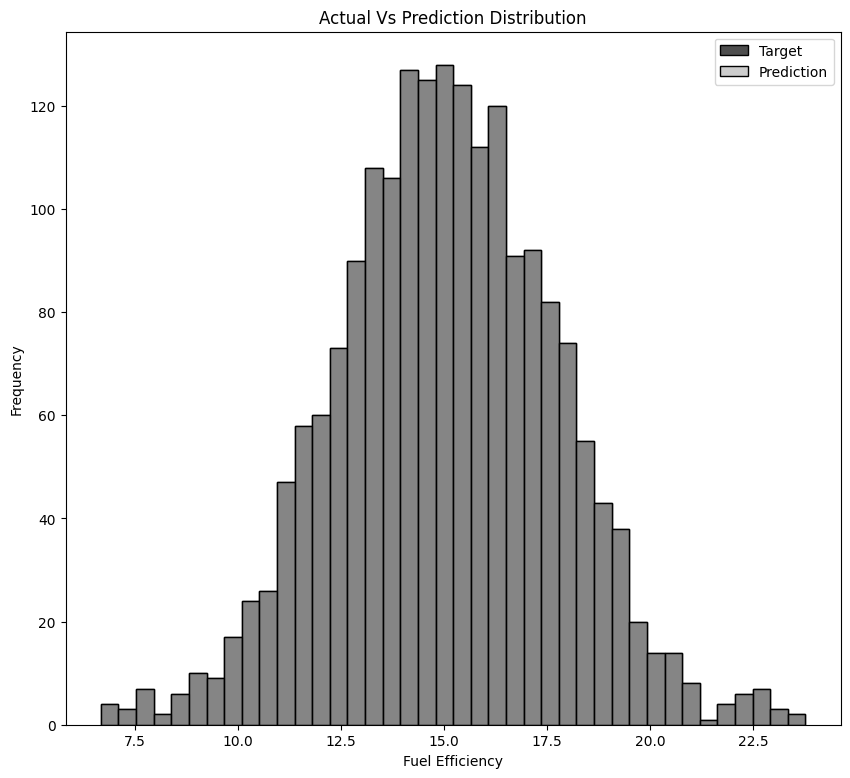

In [97]:
plt.figure(figsize = (10,9))

sns.histplot(y_val, label = "Target", color ='#222222',alpha= 0.8, bins = 40)
sns.histplot(y_pred, label = "Prediction", color = '#aaaaaa', alpha = 0.6, bins = 40) 

plt.legend()

plt.ylabel("Frequency")
plt.xlabel("Fuel Efficiency")
plt.title("Actual Vs Prediction Distribution")

plt.show()

In [98]:
# Calculate error
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()

    return np.sqrt(mse)

In [99]:
print(rmse(y_val, y_pred).round(11))

1.2e-10


In [100]:
# for mean value filling
X_train_2 = df_train_2.values
x_val_2 = df_val_2.values
x_test_2 = df_test_2.values

In [101]:
b_0, b = train_linear_regression(X_train_2, y_train)

In [102]:
y_pred = b_0 + x_val_2.dot(b)

In [103]:
print(rmse(y_val, y_pred))

2.9358722720957924e-10


#### Question 4

### Regularization

In [104]:
def train_linear_regression_reg(X, y , r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

In [105]:
W_0, W = train_linear_regression_reg(X_train_1, y_train, r = 0)

In [106]:
y_pred = W_0 + X_val_1.dot(W)


In [107]:
print(rmse(y_val, y_pred))

1.1802679318480694e-10


#### Question 5

In [ ]:
def evaluate_seeds(df, target_col):
    rmse_values = []  # changed from RMSE = []
    seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

    for value in seeds:
        np.random.seed(value)

        n = len(df)
        n_val = int(0.2 * n)
        n_test = int(0.2 * n)
        n_train = n - (n_val + n_test)

        idx = np.arange(n)
        np.random.shuffle(idx)
        df_shuffled = df.iloc[idx]

        df_train = df_shuffled.iloc[:n_train].copy()
        df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
        df_test = df_shuffled.iloc[n_train + n_val:].copy()

        df_train = df_train.fillna(0)
        df_val = df_val.fillna(0)
        df_test = df_test.fillna(0)

        X_train = df_train.drop(columns=[target_col]).values
        y_train = df_train[target_col].values

        X_val = df_val.drop(columns=[target_col]).values
        y_val = df_val[target_col].values

        X_test = df_test.drop(columns=[target_col]).values
        y_test = df_test[target_col].values

        b_0, b = train_linear_regression(X_train, y_train)

        y_pred = b_0 + X_val.dot(b)

        # Use rmse() function properly
        rmse_values.append(rmse(y_val, y_pred))

    return rmse_values


In [111]:
rmse_results = evaluate_seeds(df, "fuel_efficiency_mpg")
print(np.std(np.array(rmse_results)).round(3))


0.007


#### Question 6

In [117]:
# seed for reproducibility
np.random.seed(9)

n = len(df)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx]

# Split
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train + n_val].copy()
df_test = df_shuffled.iloc[n_train + n_val:].copy()

# Fill missing values
df_train = df_train.fillna(0)
df_val = df_val.fillna(0)
df_test = df_test.fillna(0)

# Combine training and validation sets
df_full_train = pd.concat([df_train, df_val]).reset_index(drop=True)

# Define target column
target_col = "fuel_efficiency_mpg"

# Separate features and target
X_full_train = df_full_train.drop(columns=[target_col]).values
y_full_train = df_full_train[target_col].values

X_test = df_test.drop(columns=[target_col]).values
y_test = df_test[target_col].values

# Train final model
b_0, b = train_linear_regression_reg(X_full_train, y_full_train, r = 0.001)

# Predict on test set
y_pred_test = b_0 + X_test.dot(b)

# Evaluate RMSE on test set
final_rmse = rmse(y_test, y_pred_test)
print("Final RMSE on Test Set:", final_rmse.round(3))


Final RMSE on Test Set: 0.516
